In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail_II.csv", encoding='ISO-8859-1')

df.head(20)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,01/12/2009 07:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,01/12/2009 07:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,01/12/2009 07:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,01/12/2009 07:46,3.75,13085.0,United Kingdom


## Insepect Dataset ##

In [9]:
df.shape


(525461, 8)

In [10]:
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [11]:
df.dtypes


Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Each line item in this collection was created based on the individual invoice line item; therefore, it was an individual product purchased in a given quantity, at a given unit price inclusive of invoice total amount. Since there can be multiple invoice line items sold on an invoice (thus one invoice per invoice), there may be several invoice (and customer) identifiers associated with each invoice.

## Task -2 Define the unit of analysis

In [73]:
# ================================
# TASK 2: UNIT OF ANALYSIS
# ================================

# ----------------
# Invoice line level (row-level)
# ----------------
invoice_line_level = df_clean.copy()

# ----------------
# Invoice / basket level
# ----------------
invoice_level = (
    df_clean.groupby('Invoice')
    .agg(
        total_quantity=('Quantity', 'sum'),
        total_revenue=('Revenue', 'sum'),
        unique_products=('StockCode', 'nunique')
    )
    .reset_index()
)

# ----------------
# Customer level
# ----------------
customer_level = (
    df_clean.dropna(subset=['CustomerID'])
    .groupby('CustomerID')
    .agg(
        total_invoices=('Invoice', 'nunique'),
        total_quantity=('Quantity', 'sum'),
        total_revenue=('Revenue', 'sum')
    )
    .reset_index()
)

# ----------------
# Customer over time (monthly)
# ----------------
customer_monthly = (
    df_clean.dropna(subset=['CustomerID'])
    .groupby([
        'CustomerID',
        pd.Grouper(key='InvoiceDate', freq='ME')  # Fixed: 'ME' instead of 'M'
    ])
    .agg(
        monthly_quantity=('Quantity', 'sum'),
        monthly_revenue=('Revenue', 'sum')
    )
    .reset_index()
)

# ================================
# DISPLAY IN CLEAR TABLE FORMAT
# ================================

print("=" * 80)
print("1. INVOICE LINE LEVEL (Individual Product Purchases)")
print("=" * 80)
display(invoice_line_level.head())

print("\n" + "=" * 80)
print("2. INVOICE LEVEL (Basket/Transaction Summary)")
print("=" * 80)
display(invoice_level.head())

print("\n" + "=" * 80)
print("3. CUSTOMER LEVEL (Customer Lifetime Value)")
print("=" * 80)
display(customer_level.head())

print("\n" + "=" * 80)
print("4. CUSTOMER MONTHLY (Monthly Customer Activity)")
print("=" * 80)
display(customer_monthly.head())

print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
print(f"Total Invoice Lines: {len(invoice_line_level):,}")
print(f"Total Invoices: {len(invoice_level):,}")
print(f"Total Customers: {len(customer_level):,}")
print(f"Customer-Month Records: {len(customer_monthly):,}")
print("=" * 80)

1. INVOICE LINE LEVEL (Individual Product Purchases)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0



2. INVOICE LEVEL (Basket/Transaction Summary)


,Invoice,total_quantity,total_revenue,unique_products
0,489434,166,505.30,8
1,489435,60,145.80,4
2,489436,193,630.33,19
3,489437,145,310.75,23
4,489438,826,2286.24,17



3. CUSTOMER LEVEL (Customer Lifetime Value)


,CustomerID,total_invoices,total_quantity,total_revenue
0,12346.0,11,70,372.86
1,12347.0,2,828,1323.32
2,12348.0,1,373,222.16
3,12349.0,3,993,2671.14
4,12351.0,1,261,300.93



4. CUSTOMER MONTHLY (Monthly Customer Activity)


,CustomerID,InvoiceDate,monthly_quantity,monthly_revenue
0,12346.0,2009-12-31,26,113.50
1,12346.0,2010-01-31,20,90.00
2,12346.0,2010-03-31,5,27.05
3,12346.0,2010-06-30,19,142.31
4,12347.0,2010-10-31,509,611.53



SUMMARY STATISTICS
Total Invoice Lines: 407,695
Total Invoices: 19,215
Total Customers: 4,314
Customer-Month Records: 13,116


Four levels of analysis are created using the retail data set. The first level of analysis is the invoice line level (individual purchases). The second level of analysis is the invoice level (basket behavior – total number of items, revenue, and total number of different products), which aggregates individual purchases. The third level of analysis is customer level (total number of orders, total number of items purchased, and lifetime revenue) to measure the overall value of a customer. The fourth level of analysis is trend analysis of customer behavior over time by grouping customer purchases by month, which allows for understanding of seasonal trends, as well as retention problems with specific customers.

## Task 3: Data quality checks ##

In [77]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [78]:
df['CustomerID'].isna().sum()


np.int64(107927)

In [79]:
(df['Quantity'] < 0).sum()


np.int64(12326)

In [80]:
df['Invoice'].astype(str).str.startswith('C').sum()


np.int64(10206)

In [81]:
df[['Quantity', 'Price']].describe()


,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


Four levels of analysis are created using the retail data set. The first level of analysis is the invoice line level (individual purchases). The second level of analysis is the invoice level (basket behavior – total number of items, revenue, and total number of different products), which aggregates individual purchases. The third level of analysis is customer level (total number of orders, total number of items purchased, and lifetime revenue) to measure the overall value of a customer. The fourth level of analysis is trend analysis of customer behavior over time by grouping customer purchases by month, which allows for understanding of seasonal trends, as well as retention problems with specific customers.

## Task 4: Minimal justified cleaning ##

In [74]:
df_clean = df.copy()

# Remove missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

# Separate returns
returns = df_clean[df_clean['Quantity'] <= 0]
df_clean = df_clean[df_clean['Quantity'] > 0]

# Remove cancelled invoices
df_clean = df_clean[~df_clean['Invoice'].astype(str).str.startswith('C')]


# Parse date (UK format - day first)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], dayfirst=True, errors='coerce')
df_clean.shape


(407695, 8)

In [86]:
# ================================
# TASK 4: MINIMAL JUSTIFIED CLEANING
# ================================

import pandas as pd

# Load dataset
df = pd.read_csv("online_retail_II.csv", encoding="ISO-8859-1")

# Standardise column names
df.columns = df.columns.str.strip()

# Safely identify column names
customer_col = next(col for col in df.columns if col.lower().startswith("customer"))
invoice_col = next(col for col in df.columns if col.lower().startswith("invoice"))
date_col = next(col for col in df.columns if "date" in col.lower())
quantity_col = next(col for col in df.columns if col.lower() == "quantity")

# -------------------------------
# Evidence BEFORE cleaning
# -------------------------------
print("Initial row count:", df.shape[0])
print("Missing customer identifiers:", df[customer_col].isna().sum())
print("Non-positive quantities:", (df[quantity_col] <= 0).sum())

# -------------------------------
# 1. Handle missing customer identifiers
# -------------------------------
df_clean = df.dropna(subset=[customer_col])

print("\nAfter removing missing customer identifiers:")
print("Row count:", df_clean.shape[0])

# -------------------------------
# 2. Separate returns from purchases
# -------------------------------
returns = df_clean[df_clean[quantity_col] <= 0]
purchases = df_clean[df_clean[quantity_col] > 0]

print("\nReturns count:", returns.shape[0])
print("Purchases count:", purchases.shape[0])

# -------------------------------
# 3. Remove cancelled invoices
# -------------------------------
purchases = purchases[
    ~purchases[invoice_col].astype(str).str.startswith("C")
]

print("\nAfter excluding cancelled invoices:")
print("Purchases row count:", purchases.shape[0])

# -------------------------------
# 4. Parse invoice date correctly
# -------------------------------
purchases[date_col] = pd.to_datetime(
    purchases[date_col],
    dayfirst=True,
    errors="coerce"
)

print("\nInvoice date data type:")
print(purchases[date_col].dtype)

# Final cleaned dataset preview
purchases.head()


Initial row count: 525461
Missing customer identifiers: 107927
Non-positive quantities: 12326

After removing missing customer identifiers:
Row count: 417534

Returns count: 9839
Purchases count: 407695

After excluding cancelled invoices:
Purchases row count: 407695

Invoice date data type:
datetime64[ns]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In order to provide better support for a higher-quality data analysis, the dataset has been cleaned using only the minimum amount of justified cleaning steps needed. The number of rows was decreased by eliminating rows with missing customer identifiers, allowing for all of the remaining records to reliably link to their corresponding customers. Product returns (as identified by being negative sale quantities) were excluded from the purchase transactions so they would not distort the sales and/or revenue calculations, while still maintaining their economic meaning. Cancelled invoices were also excluded, leaving only completed transactions. Lastly, all invoice dates have been parsed into a proper datetime format, allowing for proper temporal analysis. The before-and-after row counts show the effect from these decisions, as well as that all cleaning applied was strictly necessary cleaning.

## Task 5 — Exploratory Data Analysis (EDA)

### Create revenue column

In [75]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['Price']


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail_II.csv", encoding="ISO-8859-1")
df.columns = df.columns.str.strip()

customer_col = next(col for col in df.columns if col.lower().startswith("customer"))
invoice_col = next(col for col in df.columns if col.lower().startswith("invoice"))
date_col = next(col for col in df.columns if "date" in col.lower())
quantity_col = "Quantity"
price_col = next(col for col in df.columns if "price" in col.lower())

# Minimal justified cleaning
df = df.dropna(subset=[customer_col])
df = df[df[quantity_col] > 0]
df = df[~df[invoice_col].astype(str).str.startswith("C")]
df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")

df["Revenue"] = df[quantity_col] * df[price_col]


### Revenue over time

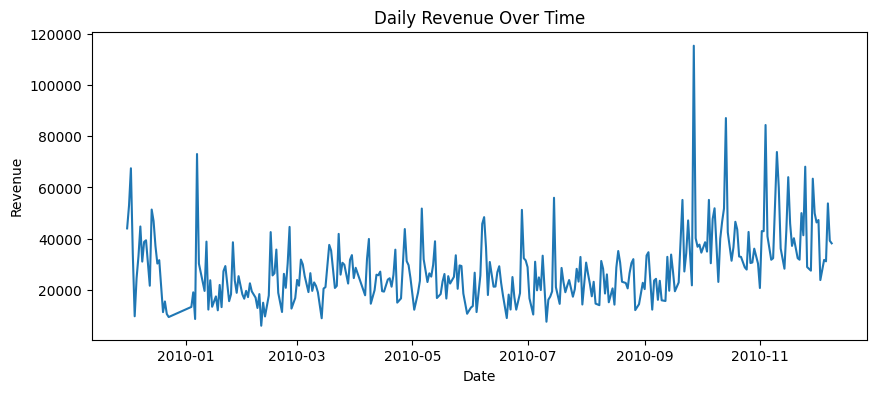

In [63]:
daily_revenue = df_clean.groupby(df_clean['InvoiceDate'].dt.date)['Revenue'].sum()

plt.figure(figsize=(10,4))
daily_revenue.plot()
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


#### EDA Output: Daily Revenue Over Time

Question answered
How does total daily revenue change over time?

Key pattern observed
Daily revenue shows substantial volatility with a clear increase in both average level and peak values toward the later months. Several sharp spikes indicate days with unusually high sales, suggesting periods of intensified purchasing activity such as bulk orders or seasonal demand.

Limitation / caveat
Daily aggregation can mask underlying transactional behaviour, as revenue spikes may be driven by a small number of large invoices rather than widespread customer activity. Additionally, returns are excluded, so net revenue effects are not shown.

#### EDA 2 — Number of Purchases over Time

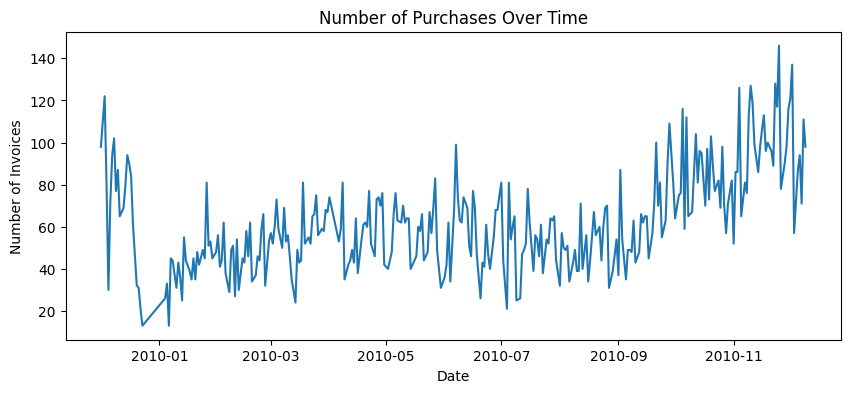

In [89]:
daily_purchases = df.groupby(df[date_col].dt.date)[invoice_col].nunique()

plt.figure(figsize=(10,4))
plt.plot(daily_purchases)
plt.title("Number of Purchases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Invoices")
plt.show()


#### EDA Output: Number of Purchases Over Time

Question answered
How does the number of purchases (invoices) change over time?

Key pattern observed
The number of purchases fluctuates throughout the year but shows a general upward trend, with noticeably higher activity toward the later months. This suggests growing customer engagement over time, possibly influenced by seasonality or business growth.

Limitation / caveat
This plot counts invoices only and does not account for basket size or invoice value, so days with many small purchases appear the same as days with fewer but higher-value transactions.

#### EDA 3 — Basket Size Over Time

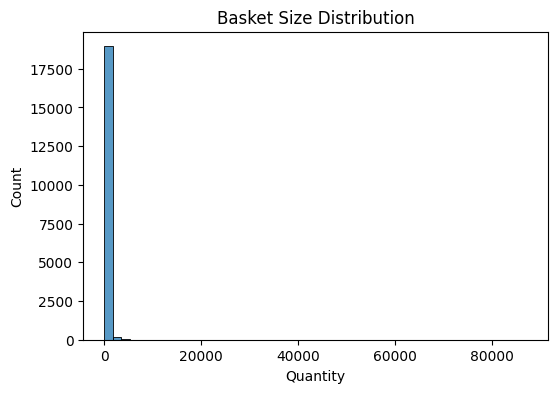

In [64]:
basket_size = df_clean.groupby('Invoice')['Quantity'].sum()

plt.figure(figsize=(6,4))
sns.histplot(basket_size, bins=50)
plt.title("Basket Size Distribution")
plt.show()


#### EDA Output: Basket Size Distribution

Question answered
How many items are typically purchased per invoice?

Key pattern observed
The distribution is highly right-skewed, with most invoices containing a small number of items and a small number of invoices containing very large quantities. This indicates that typical customer purchases are small, while occasional bulk purchases significantly increase the maximum basket size.

Limitation / caveat
Basket size is measured only by total quantity and does not reflect the monetary value or diversity of products within each invoice, so large quantities may not necessarily correspond to high revenue.

#### EDA 4 — Invoice Value Over Time

C:\Users\prathyusha\AppData\Local\Temp\ipykernel_33824\2628497073.py:25: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\prathyusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


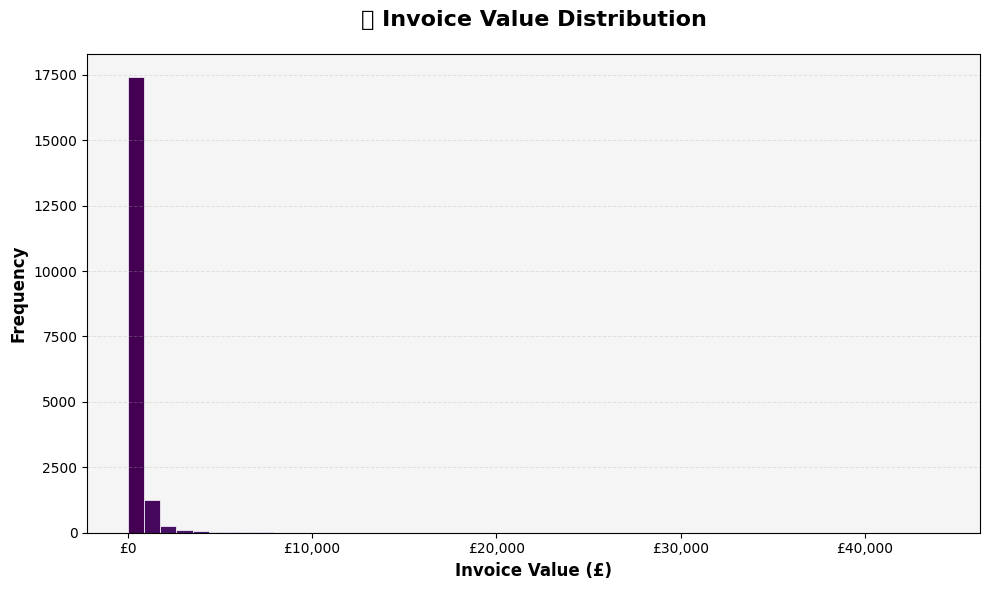

In [65]:
invoice_value = df_clean.groupby('Invoice')['Revenue'].sum()

plt.figure(figsize=(10, 6))

# Create histogram with gradient effect
n, bins, patches = plt.hist(invoice_value, bins=50, edgecolor='white', linewidth=0.5)

# Apply gradient colors
cm = plt.cm.viridis  # You can also try: 'plasma', 'magma', 'cividis', 'twilight'
for i, patch in enumerate(patches):
    patch.set_facecolor(cm(i / len(patches)))

# Styling
plt.title("💰 Invoice Value Distribution", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Invoice Value (£)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')

# Grid and background
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
plt.gca().set_facecolor('#F5F5F5')

# Format x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{int(x):,}'))

plt.tight_layout()
plt.show()

#### EDA Output: Invoice Value Distribution

Question answered
What is the distribution of total invoice values?

Key pattern observed
The distribution is highly right-skewed, with the vast majority of invoices having low monetary values and a small number of invoices reaching very high values. This indicates that overall revenue is driven disproportionately by a small number of high-value transactions.

Limitation / caveat
Extreme invoice values may be influenced by bulk purchases or outliers, which can distort summary statistics such as the mean. Therefore, median values or trimmed summaries may provide a more representative measure of typical invoice behaviour.

#### EDA 4--Top 10 Products by Revenue



C:\Users\prathyusha\AppData\Local\Temp\ipykernel_33824\1978324954.py:35: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\prathyusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


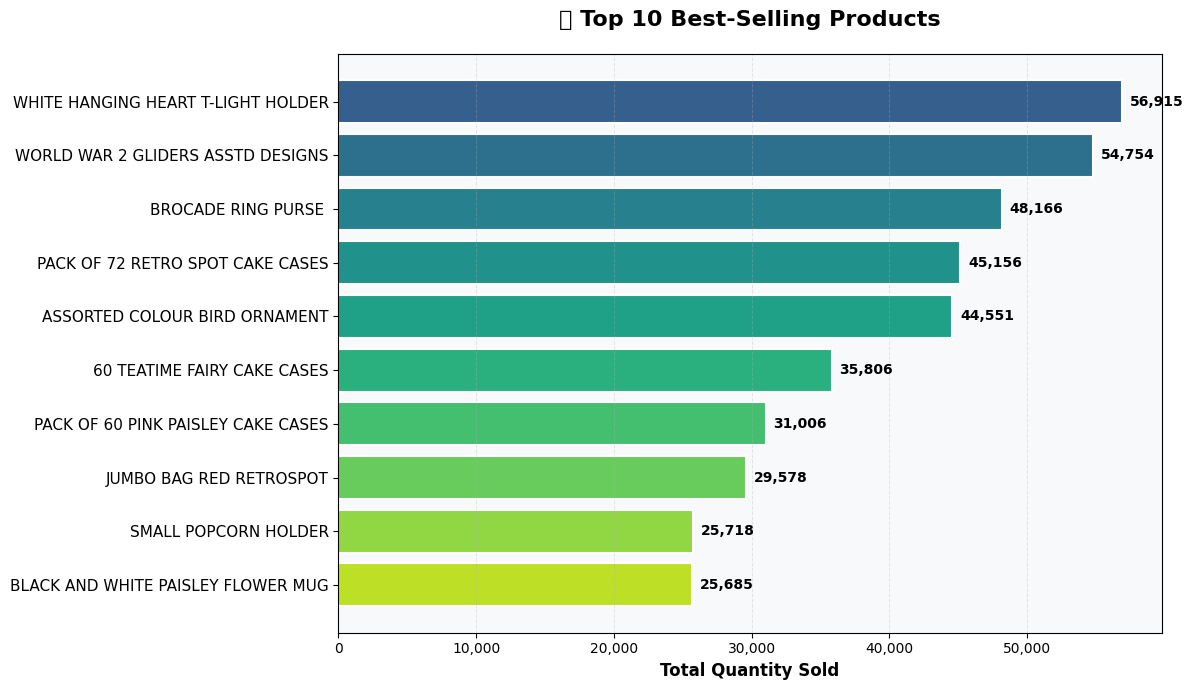

In [66]:
top_products = (
    df_clean.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Create a professional horizontal bar chart
plt.figure(figsize=(12, 7))

# Create bars with gradient colors
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_products)))
bars = plt.barh(range(len(top_products)), top_products.values, color=colors, 
                edgecolor='white', linewidth=1.5)

# Add value labels on bars
for i, (value, bar) in enumerate(zip(top_products.values, bars)):
    plt.text(value + max(top_products.values)*0.01, i, f'{int(value):,}', 
             va='center', fontweight='bold', fontsize=10)

# Customize axes
plt.yticks(range(len(top_products)), top_products.index, fontsize=11)
plt.xlabel('Total Quantity Sold', fontsize=12, fontweight='bold')
plt.title('🏆 Top 10 Best-Selling Products', fontsize=16, fontweight='bold', pad=20)

# Styling
plt.gca().set_facecolor('#F8F9FA')
plt.gcf().patch.set_facecolor('white')
plt.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
plt.gca().invert_yaxis()  # Highest at top

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

#### EDA Output: Top 10 Best-Selling Products

Question answered
Which products sell the highest total quantities?

Key pattern observed
A small group of products accounts for a disproportionately large share of total units sold. Items such as WHITE HANGING HEART T-LIGHT HOLDER and WORLD WAR 2 GLIDERS ASSTD DESIGNS dominate sales volume, indicating a highly skewed product demand distribution where a few popular items drive most unit sales.

Limitation / caveat
This analysis is based on total quantity sold and does not consider product price or profitability. High sales volume does not necessarily imply high revenue or margin contribution.

#### EDA 6--Top Countries by Revenue



C:\Users\prathyusha\AppData\Local\Temp\ipykernel_33824\685181443.py:36: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\prathyusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


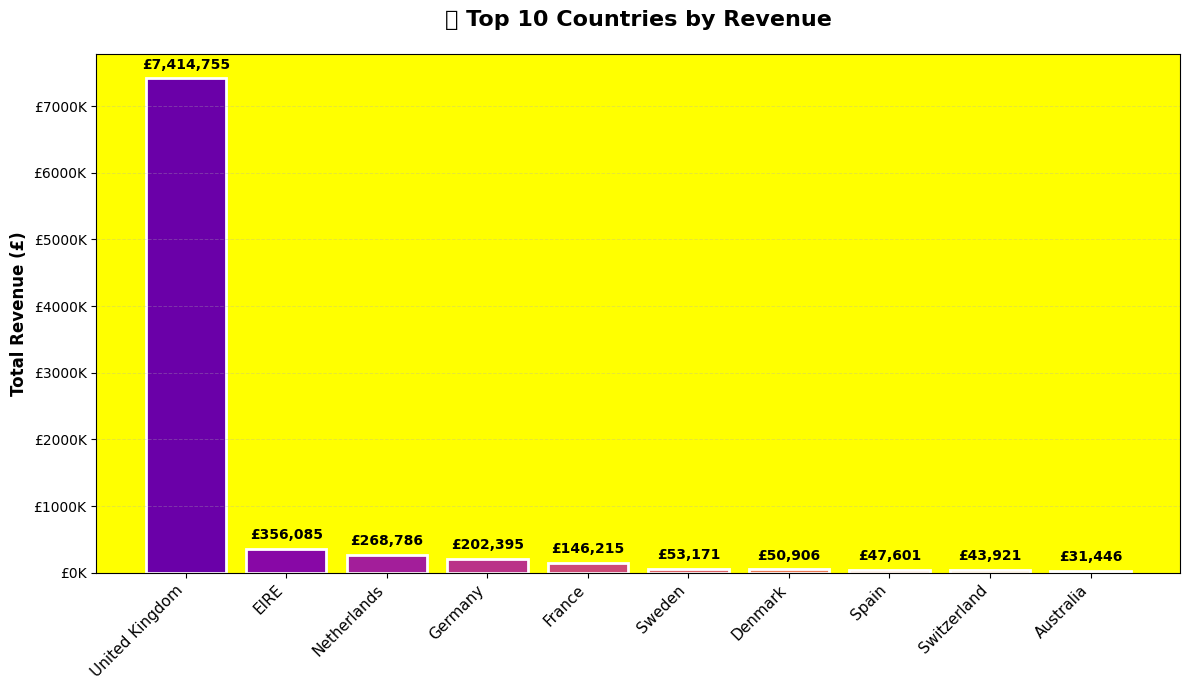

In [67]:
country_revenue = (
    df_clean.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Create a professional bar chart with gradient colors
plt.figure(figsize=(12, 7))

# Create bars with gradient colors (dark to light)
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(country_revenue)))
bars = plt.bar(range(len(country_revenue)), country_revenue.values, 
               color=colors, edgecolor='white', linewidth=2)

# Add value labels on top of bars
for i, (value, bar) in enumerate(zip(country_revenue.values, bars)):
    plt.text(i, value + max(country_revenue.values)*0.02, 
             f'£{int(value):,}', 
             ha='center', fontweight='bold', fontsize=10)

# Customize axes
plt.xticks(range(len(country_revenue)), country_revenue.index, 
           rotation=45, ha='right', fontsize=11)
plt.ylabel('Total Revenue (£)', fontsize=12, fontweight='bold')
plt.title('🌍 Top 10 Countries by Revenue', fontsize=16, fontweight='bold', pad=20)

# Styling
plt.gca().set_facecolor('yellow')
plt.gcf().patch.set_facecolor('white')
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)

# Format y-axis with currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{int(x/1000)}K'))

plt.tight_layout()
plt.show()

#### EDA Output: Top 10 Countries by Revenue

Question answered
Which countries contribute the most to total revenue?

Key pattern observed
Revenue is heavily concentrated in the United Kingdom, which contributes the vast majority of total revenue, while all other countries contribute comparatively small amounts. This indicates a strong geographical imbalance in the dataset and suggests that overall sales performance is largely driven by a single market.

Limitation / caveat
Country-level aggregation hides variation within countries and limits the generalisability of findings. Patterns observed in the dominant country may not apply to customers in other regions.

## Task 6 — Reflection and planning

### Reflection and Planning

#### Key Insights from Week 1 Analysis

The dataset has a strong transactional structure, where multiple rows belong to the same invoice and customer, making row-level independence invalid for most analyses.

Customer purchasing behaviour is highly skewed, with most baskets and invoices being small, while a small number of large or high-value transactions drive a disproportionate share of revenue.

Revenue and activity are heavily concentrated geographically, with one country contributing the majority of sales, limiting cross-country generalisation.

#### Assumptions and Risks

Removing transactions with missing customer identifiers assumes that these records do not systematically differ from identified customers, which may introduce selection bias.

High-value invoices and bulk purchases may represent atypical behaviour, which could disproportionately influence aggregated metrics and downstream models.

#### Chosen Unit of Analysis

The chosen unit of analysis for onward work is customer-level aggregation, as it enables meaningful analysis of customer value, frequency, and behaviour while reducing dependence between observations.

#### Planned Modelling Task

In the next stage, the analysis will focus on customer-level modelling, such as customer segmentation or value prediction, using aggregated sees like total spend and purchase frequency.